<a href="https://colab.research.google.com/github/amrios80/MINE_4210_ADL_202520/blob/main/taller_1_RIOS_ADRIANA_PRIETO_LUIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2: Redes neuronales MLP, búsqueda de hiperparámetros y callbacks**
**Tutor: Nicolás Tibatá**

## **Tabla de Contenido**

[Contexto y objetivos](#scrollTo=R4YrUaE6udsU)<br>
[1. Introducción de los datos](#scrollTo=VjA8zwzJvmeO)<br>
[2. Preparación y Modelamiento](#scrollTo=kG8XHROzvuEH)<br>
[3. Taller 1](#scrollTo=JTKc52_Wvs_N)<br>


### **Contexto y Objetivos**

**Problema**
- En este problema se busca predecir el churn de los clientes de una empresa de telecomunicaciones además de poder identificar las variables más determinantes a la hora de predecir el abandono.

**Objetivos**
1. Explorar el dataset para entender las variables que determinan el churn.
2. Construir y entrenar un modelo de clasificación con Keras para predecir el churn.
3. Implementar búsqueda de hiperparámetros y callbacks para futuros entrenamientos.


**Datos**

Los datos los puedes consultar [aquí](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset).

### **1. Introduccion a los datos**

La muestra del conjunto de datos proporcionado es una colección de información de clientes de una empresa de telecomunicaciones, la cual busca predecir si un cliente abandonará (churn) o no sus servicios.

**Detalles de los Datos:**

| Columna | Tipo de Dato | Descripción |
|---------|--------------|-------------|
| Age | Numérico | La edad del cliente. |
| Gender | Categórico | El género del cliente (Male, Female). |
| Tenure | Numérico | El tiempo en meses que el cliente ha estado con la empresa. |
| Usage Frequency | Numérico | La frecuencia con la que el cliente usa el servicio. |
| Support Calls | Numérico | El número de llamadas al servicio de soporte técnico. |
| Payment Delay | Numérico | El número de días de retraso en el pago del cliente. |
| Subscription Type | Categórico | El tipo de suscripción del cliente (ej. Basic, Standard, Premium). |
| Contract Length | Categórico | La duración del contrato del cliente (ej. Monthly, Quarterly, Annual). |
| Total Spend | Numérico | La cantidad total de dinero gastada por el cliente. |
| Last Interaction | Numérico | El tiempo (en días) desde la última interacción con el cliente. |
| Churn | Numérico/Binario | Variable objetivo que indica si el cliente se fue (1) o se quedó (0). |


In [1]:
# Instalación e Importación de librerías
!pip install keras-tuner -q
!pip install scikeras -q
!pip install ydata-profiling -q
#!pip install scikit-learn -q
!pip install tensorflow -q
!pip install scikit-learn==1.4.2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import userdata
from ydata_profiling import ProfileReport

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scikeras.wrappers import KerasClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into ac

In [2]:
# os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
# os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

# !kaggle datasets download -d muhammadshahidazeem/customer-churn-dataset

# ! unzip "customer-churn-dataset.zip"

In [3]:
# Read csv from github repo
data = pd.read_csv("https://raw.githubusercontent.com/nicolastibata/MINE_4210_ADL_202520/refs/heads/main/labs/Laboratorio_2/churn_data.csv")
data

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,32.0,Female,50.0,16.0,1.0,9.0,Basic,Quarterly,774.06,2.0,0.0
1,27.0,Female,5.0,1.0,10.0,29.0,Premium,Annual,295.00,25.0,1.0
2,42.0,Male,3.0,16.0,2.0,11.0,Premium,Annual,623.61,25.0,0.0
3,27.0,Female,35.0,29.0,1.0,2.0,Basic,Quarterly,567.96,10.0,0.0
4,32.0,Male,51.0,18.0,0.0,5.0,Premium,Annual,831.21,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
164995,50.0,Female,38.0,19.0,0.0,12.0,Basic,Annual,646.00,14.0,0.0
164996,29.0,Male,49.0,24.0,0.0,8.0,Premium,Annual,551.18,5.0,0.0
164997,23.0,Female,43.0,12.0,2.0,17.0,Premium,Quarterly,881.94,3.0,0.0
164998,42.0,Female,56.0,21.0,4.0,19.0,Standard,Quarterly,925.03,7.0,0.0


### **2. Preparacion y Modelamiento**

#### **Preparacion**

In [5]:
# Primer Paso: Separar los datos en entrenamiento y test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=71)

# Eliminate rows where Churn is Nan
train_data = train_data.dropna(subset=['Churn'])

# Segundo Paso: Separamos nuestras variables explicativas del target en nuestro set de entrenamiento
X_train, y_train = train_data.drop(['Churn'], axis=1), train_data['Churn']
display(X_train.head())
display(y_train.head())

# Tercer Paso: Aplicar onehot a la variable a predecir ya que la tenemos como variable categórica
encoder_y = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder_y.fit_transform(y_train.values.reshape(-1, 1))

# Cuarto Paso: Standard Scaler para variables numericas, One hot Encoder para variables categoricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns
print(f'Numerical {numeric_features}')
print(f'Categorical {categorical_features}')

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
117558,21.0,Male,29.0,30.0,1.0,18.0,Basic,Quarterly,871.62,17.0
163991,46.0,Male,7.0,11.0,0.0,13.0,Basic,Annual,712.31,7.0
153167,19.0,Male,30.0,22.0,1.0,13.0,Standard,Quarterly,828.69,15.0
112382,23.0,Male,25.0,28.0,1.0,8.0,Standard,Annual,970.88,2.0
64212,48.0,Male,52.0,9.0,1.0,0.0,Basic,Quarterly,995.60,12.0


,Churn
117558,0.0
163991,0.0
153167,0.0
112382,0.0
64212,0.0


Numerical Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')
Categorical Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [6]:
# Pipeline Primer Paso: Se definen los pasos a realizar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Pipeline Segundo Paso: Se aplican esos pasos a las variables explicativas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline Tercer Paso: Se acopla el preprocesador
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Se aplica el pipeline al set de datos
X_train_processed = full_pipeline.fit_transform(X_train)

# Sacamos los nombres de las columnas y organizamos el Dataframe
numeric_feature_names = numeric_features.tolist()

categorical_feature_names = full_pipeline.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .named_steps['onehot']\
    .get_feature_names_out(categorical_features)

all_feature_names = numeric_feature_names + categorical_feature_names.tolist()
X_train_processed = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_train_processed.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-1.594927,-0.181011,1.632003,-0.488369,1.146901,0.831584,0.448783,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.941032,-1.467529,-0.612407,-1.029167,0.383212,-0.110327,-0.747597,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.797803,-0.122533,0.686988,-0.488369,0.383212,0.577763,0.209507,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.392050,-0.414923,1.395749,-0.488369,-0.380478,1.418454,-1.345787,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.143909,1.163985,-0.848661,-0.488369,-1.602382,1.564609,-0.149407,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


#### **Modelamiento**

Vamos a utilizar la arquitectura de un MLP con tres capas ocultas, la cual se ve de la siguiente manera para este caso:

![MLP](https://github.com/nicolastibata/MINE_4210_ADL_202520/blob/main/docs/images/MLP%20Lab2.png?raw=true)

---

Dado que realizaremos un modelamiento junto a un Pipeline, primero tendremos que definir una función que nos ayudará a construir nuestra Red Neuronal que llamaremos ***get_model***. Par ello utilizamos la libreria [SciKeras](https://www.adriangb.com/scikeras/stable/quickstart.html).

In [7]:
model = Sequential(name="3HL_MLP")

model.add(Input(shape=(X_train_processed.shape[1],), name='Input_Layer'))
model.add(Dense(15,activation='relu',name='Hidden_Layer1'))
model.add(Dense(8,activation='relu',name='Hidden_Layer2'))
model.add(Dense(4,activation='relu',name='Hidden_Layer3'))
model.add(Dense(2,activation='softmax',name='Output_Layer'))

In [8]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=3.0),
                metrics=['accuracy'])

model.summary()

Model: "3HL_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)           │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer3 (Dense)           │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414 (1.62 KB)

 Trainable params: 414 (1.62 KB)

 Non-trainable params: 0 (0.00 B)

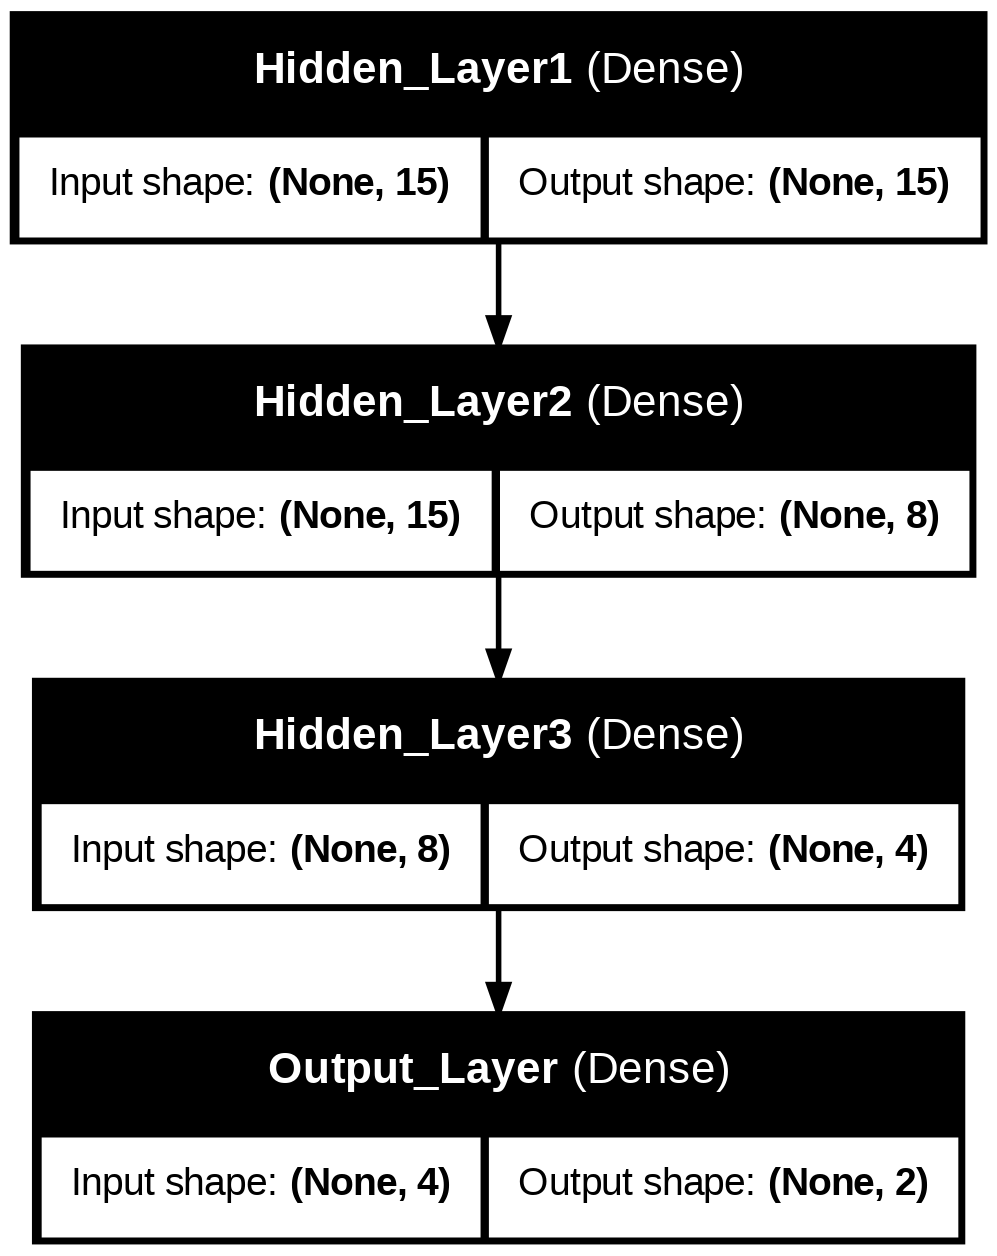

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
%%time
history = model.fit(
    X_train_processed,
    y_train_encoded,
    batch_size=10,
    epochs=5
)

Epoch 1/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8985 - loss: 1.4477
Epoch 2/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.8974 - loss: 0.4228
Epoch 3/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8969 - loss: 0.4217
Epoch 4/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8992 - loss: 0.4087
Epoch 5/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8996 - loss: 0.4127
CPU times: user 2min 20s, sys: 5.71 s, total: 2min 26s
Wall time: 3min 14s


**Evaluamos nuestro modelo con los datos de entrenamiento**

In [11]:
loss, accuracy = model.evaluate(X_train_processed, y_train_encoded)
print(f'Loss: {loss}, Accuracy: {accuracy}')

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9106 - loss: 0.3041
Loss: 0.3068307936191559, Accuracy: 0.9095378518104553


In [12]:
y_pred = model.predict(X_train_processed)
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 4s 916us/step


array([0, 0, 0, ..., 0, 0, 0])

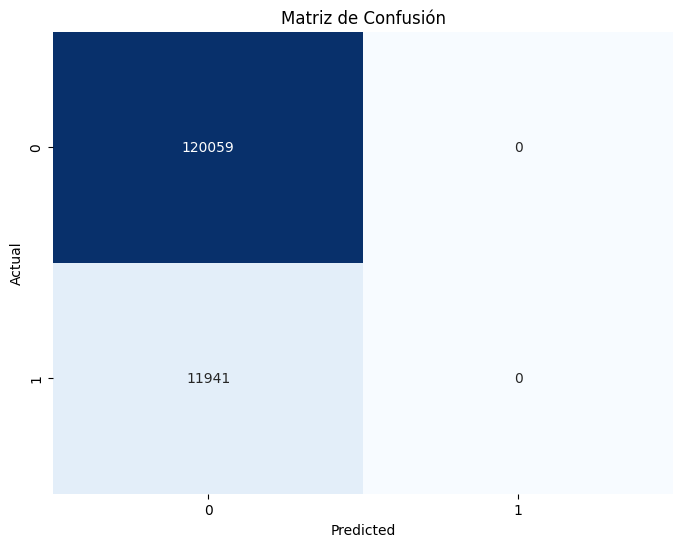

In [13]:
cm = confusion_matrix(y_train, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [14]:
print(classification_report(y_train, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    120059
         1.0       0.00      0.00      0.00     11941

    accuracy                           0.91    132000
   macro avg       0.45      0.50      0.48    132000
weighted avg       0.83      0.91      0.87    132000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Ahora evaluemos el modelo con los datos de test**

In [15]:
# Separar los datos en X_test y y_test
X_test, y_test = test_data.drop(['Churn'], axis=1), test_data['Churn']
display(X_test.head())
display(y_test.head())

# Recordemos transformar nuestra variable y_train con onehot
y_test_encoded = encoder_y.transform(y_test.values.reshape(-1, 1))
display(y_test_encoded)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
56050,34.0,Male,31.0,22.0,3.0,1.0,Standard,Annual,701.35,17.0
19087,31.0,Female,57.0,30.0,5.0,13.0,Basic,Quarterly,296.00,3.0
160556,36.0,Female,13.0,23.0,3.0,7.0,Basic,Quarterly,523.98,7.0
44913,20.0,Female,31.0,18.0,1.0,3.0,Standard,Quarterly,695.68,7.0
13333,43.0,Female,37.0,22.0,4.0,13.0,Premium,Annual,503.59,2.0


,Churn
56050,0.0
19087,1.0
160556,0.0
44913,0.0
13333,0.0


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [16]:
# Apliquemos el pipeline para ahorrarnos pasos
X_test_processed = full_pipeline.transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=all_feature_names)
X_test_processed.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,-0.276228,-0.064055,0.686988,0.593226,-1.449644,-0.175127,0.448783,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.580543,1.456376,1.632003,1.674822,0.383212,-2.571737,-1.226149,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.073351,-1.116660,0.805115,0.593226,-0.533216,-1.223818,-0.747597,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.696365,-0.064055,0.214481,-0.488369,-1.144168,-0.208651,-0.747597,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.636717,0.286814,0.686988,1.134024,0.383212,-1.344372,-1.345787,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
y_pred = model.predict(X_test_processed)
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step


array([0, 0, 0, ..., 0, 0, 0])

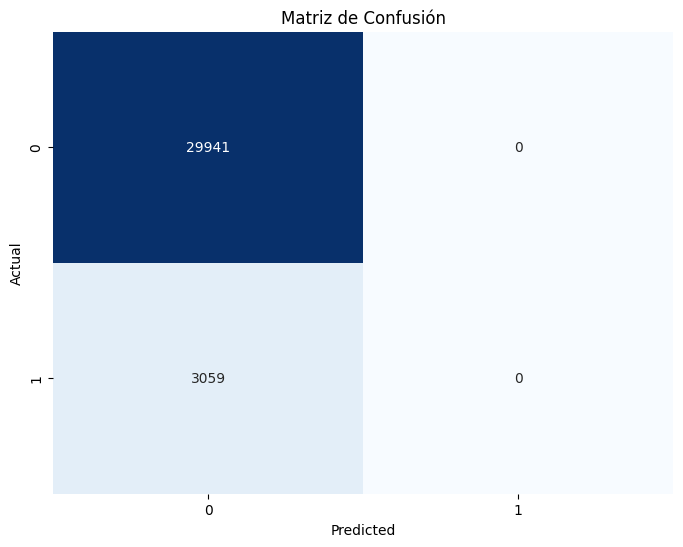

In [18]:
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [19]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     29941
         1.0       0.00      0.00      0.00      3059

    accuracy                           0.91     33000
   macro avg       0.45      0.50      0.48     33000
weighted avg       0.82      0.91      0.86     33000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Búsqueda de Hiperparámetros y Callbacks**

In [20]:
def get_model(meta, activation, n_layers, hidden_layer_1, hidden_layer_2 = None, hidden_layer_3 = None, optimizer='sgd'):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = [hidden_layer_1, hidden_layer_2, hidden_layer_3]

    model = Sequential(name="Red_MLP")
    model.add(Input(shape=(n_features_in_,))) # Correct input shape for processed data

    for i in range(n_layers):
        if dims[i] is not None: # Add layers only if the dimension is specified
            model.add(Dense(dims[i], activation=activation))

    model.add(Dense(2, activation='softmax')) # Corrected output layer for binary classification
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # Necesario para agregar el callback
    return model

In [21]:
# Detiene el entrenamiento si la precisión de validación no mejora después de 2 épocas
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [22]:
clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy",
    n_layers=2,
    hidden_layer_1=16,
    hidden_layer_2=8,
    hidden_layer_3=4,
    optimizer="sgd",
    metrics=["accuracy"],
    epochs=10,
    activation="relu",
    callbacks=[early_stopping_callback],
    validation_split=0.2  # Usar 20% de los datos de entrenamiento para validación
)

clf

KerasClassifier(
	model=<function get_model at 0x7b7b80701da0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b901524b0>]
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=10
	n_layers=2
	hidden_layer_1=16
	hidden_layer_2=8
	hidden_layer_3=4
	activation=relu
	class_weight=None
)

In [23]:
full_pipeline_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', clf)
])

full_pipeline_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequen...
                                                  Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object'))])),
                ('clf',
                 KerasClassifier(activation='relu', callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b901524b0>], epochs=10, hidden_layer_1=16, hidden_layer_2=8, hidden_layer_3=4, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7b7b80701da0>, n_layers=2, optimizer='sgd', validation_split=0.2))])

In [24]:
params = {
    "clf__hidden_layer_1": [1, 2, 3],
    "clf__hidden_layer_2": [1, 2, 3],
    "clf__hidden_layer_3": [1, 2, 3],
    "clf__n_layers": [1, 2, 3],
    "clf__activation": ["relu", "linear", "sigmoid"],
    "clf__optimizer": ["adam", "sgd"],
    "clf__optimizer__learning_rate": [3],
    "clf__epochs": [1],
}

grid = RandomizedSearchCV(full_pipeline_clf, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)

In [25]:
%%time
grid.fit(X_train, y_train_encoded)

2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8824 - loss: 0.2867 - val_accuracy: 0.9649 - val_loss: 0.1200
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8999 - loss: 0.2717 - val_accuracy: 0.9618 - val_loss: 0.1308
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9006 - loss: 0.2755 - val_accuracy: 0.9690 - val_loss: 0.1065
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9288 - loss: 0.2272 - val_accuracy: 0.9672 - val_loss: 0.1133
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9428 - loss: 0.1947 - val_accuracy: 0.9682 - val_loss: 0.1094
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9088 - loss: 0.2477 - val_accuracy: 0.9653 - val_loss: 0.1170
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2200/2200 ━━━━━━━━━━

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                Si...
                                              KerasClassifier(activation='relu', callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b901524b0>], epochs=10, hidden_layer_1=16, hidden_layer_2=8, hidden_layer_3=4, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7b7b80701da0>, n_layers=2, optimizer='sgd', validation_split=0.2))]),
                   param_distributions={'clf__activation': ['relu', 'linear',
                                                            'sigmoid'],
                                        'clf__epochs': [1],
                                        'clf__hidden_layer_1': [1, 2, 3],
                                        'clf__hidden_layer_2': [1, 2, 3],
                                        'clf__hidden_layer_3': [1, 2, 3],
                                        'clf__n_layers': [1, 2, 3],
                                        'clf__optimizer': ['adam', 'sgd'],
                                        'clf__optimizer__learning_rate': [3]},
                   random_state=33, scoring='accuracy')

In [26]:
best_model = grid.best_estimator_

grid.best_params_

{'clf__optimizer__learning_rate': 3,
 'clf__optimizer': 'sgd',
 'clf__n_layers': 1,
 'clf__hidden_layer_3': 3,
 'clf__hidden_layer_2': 1,
 'clf__hidden_layer_1': 2,
 'clf__epochs': 1,
 'clf__activation': 'linear'}

In [27]:
y_pred = best_model.predict(X_train)
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

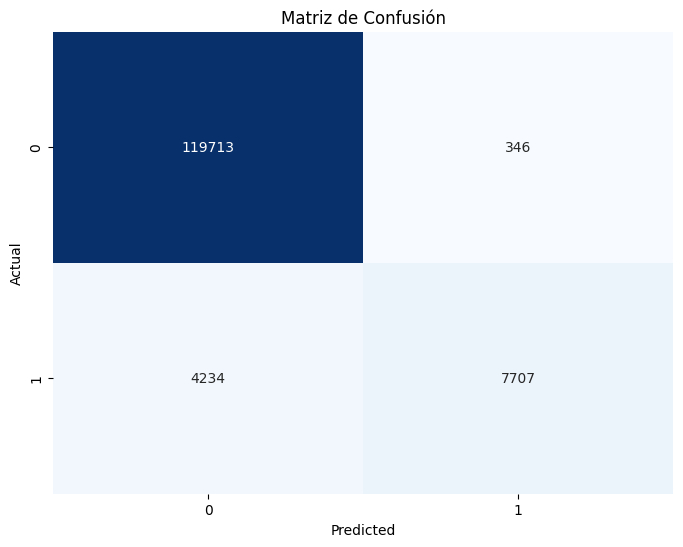

In [28]:
cm = confusion_matrix(y_train, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [29]:
print(classification_report(y_train_encoded, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    120059
           1       0.96      0.65      0.77     11941

   micro avg       0.97      0.97      0.97    132000
   macro avg       0.96      0.82      0.88    132000
weighted avg       0.97      0.97      0.96    132000
 samples avg       0.97      0.97      0.97    132000



In [30]:
y_pred = best_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0, 1, 0, ..., 1, 0, 0])

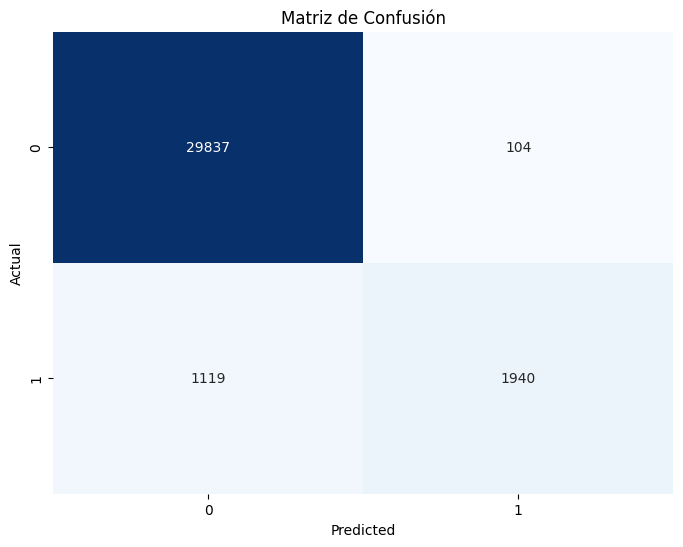

In [31]:
#y_test_classes = y_test_encoded.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     29941
         1.0       0.95      0.63      0.76      3059

    accuracy                           0.96     33000
   macro avg       0.96      0.82      0.87     33000
weighted avg       0.96      0.96      0.96     33000



### **3. Taller 1**

**Solucion Punto 1:**
Para crear una arquitectura que solucionara un problema de clasificacion binaria con 1 sola neurona de salida tuvimos que cambiar la funcion de activacion a Sigmoide, configurar una funcion de perdida logaritmica como la binary_crossentropy y finalmente dejar solo 1 neurona de salida o mapeo en la capa de salida.

In [33]:
model2 = Sequential(name="3HL_1OUTPUT")

model2.add(Input(shape=(X_train_processed.shape[1],), name='Input_Layer'))
model2.add(Dense(15,activation='relu',name='Hidden_Layer1'))
model2.add(Dense(8,activation='relu',name='Hidden_Layer2'))
model2.add(Dense(4,activation='relu',name='Hidden_Layer3'))
model2.add(Dense(2,activation='relu',name='Hidden_Layer4'))
model2.add(Dense(1,activation='sigmoid',name='Output_Layer'))

In [34]:
model2.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=3.0),
                metrics=['accuracy'])

model2.summary()

Model: "3HL_1OUTPUT"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)           │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer3 (Dense)           │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer4 (Dense)           │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
%%time
history2 = model2.fit(
    X_train_processed,
    y_train,
    batch_size=10,
    epochs=5
)

Epoch 1/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9077 - loss: 0.3618
Epoch 2/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9078 - loss: 0.3579
Epoch 3/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9079 - loss: 0.3680
Epoch 4/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9074 - loss: 0.3609
Epoch 5/5
13200/13200 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9048 - loss: 0.3690
CPU times: user 2min 25s, sys: 6.04 s, total: 2min 31s
Wall time: 2min 23s


In [36]:
loss2, accuracy2 = model2.evaluate(X_train_processed, y_train)
print(f'Loss: {loss2}, Accuracy: {accuracy2}')

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9106 - loss: 0.3525
Loss: 0.35387328267097473, Accuracy: 0.9095378518104553


In [37]:
y_pred_2 = model2.predict(X_train_processed)
y_pred_classes_2 = y_pred_2.argmax(axis=1)
y_pred_classes_2

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 4s 950us/step


array([0, 0, 0, ..., 0, 0, 0])

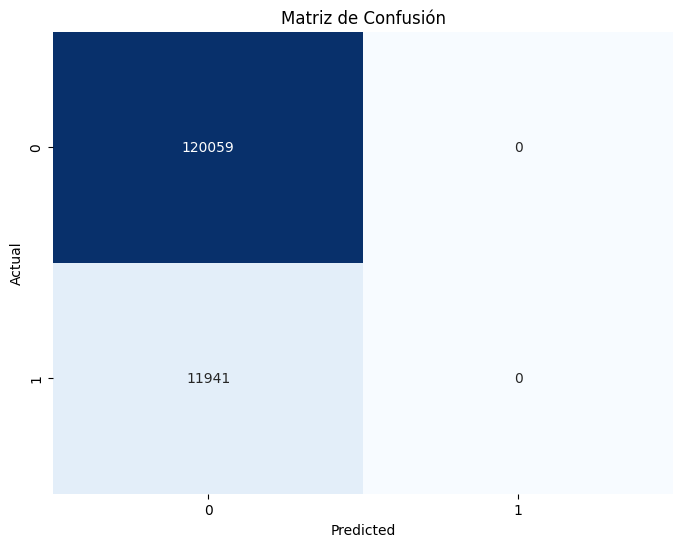

In [38]:
cm_2 = confusion_matrix(y_train, y_pred_classes_2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

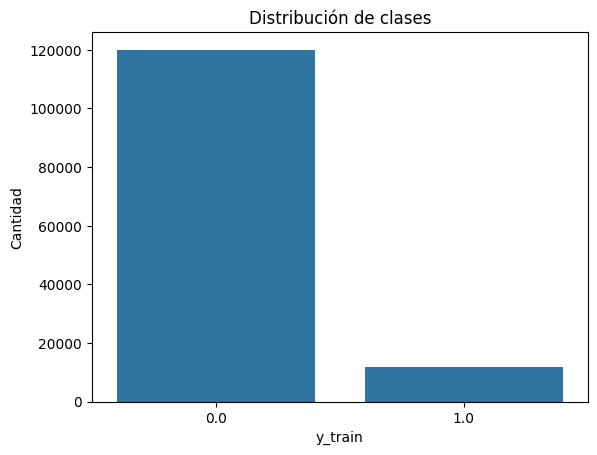

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

counts = y_train.value_counts()

sns.barplot(x=counts.index.astype(str), y=counts.values)
plt.title("Distribución de clases")
plt.ylabel("Cantidad")
plt.xlabel("y_train")
plt.show()

**Comparamos los resultados del modelo (model2) con los resultados del modelo inicial**


*   Resultado de la evaluación del modelo inicial (mod) con los datos de entrenamiento:

    *Loss: 0.3245515525341034, Accuracy: 0.9095378518104553*

*   Resultado de la evaluación del modelo 2 (mod2) con los datos de entrenamiento:

    *Loss: 0.38791701197624207, Accuracy: 0.9095378518104553*


**Conclusion**: La precisión para los dos modelos es exactamente igual y la perdida es ligeramente mayor en el modelo 2, sin embargo, de acuerdo con la matriz de confusion los modelos clasifican bien los clientes NO CHURN pero no identifica los que hacen CHURN que es finalmente el comportamiento que queremos predecir. Esto se debe a que las clases de la variable objetivo (y_train) se encuentran desbalanceadas como podemos verlo en la grafica de distribucion de clases, existen mayor numero de registros para la clase NO CHURN que para la clase CHURN.

**Solucion Punto 2:**

Nueva búsqueda de hiperparámetros basándose en la arquitectura propuesta en el punto 1. Pero en este caso modifique (si cree necesario) los pasos de preprocesamiento del pipeline y/o los hiperparámetros. Documente los cambios hechos en una celda markdown y compare los resultados con el punto 1.

In [40]:
def get_model2(meta, activation, n_layers, hidden_layer_1, hidden_layer_2 = None, hidden_layer_3 = None, hidden_layer_4 = None, optimizer='sgd'):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = [hidden_layer_1, hidden_layer_2, hidden_layer_3, hidden_layer_4]

    model = Sequential(name="Red_MLP")
    model.add(Input(shape=(n_features_in_,))) # Correct input shape for processed data

    for i in range(n_layers):
        if dims[i] is not None: # Add layers only if the dimension is specified
            model.add(Dense(dims[i], activation=activation))

    model.add(Dense(1, activation='sigmoid')) # Corrected output layer for binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # Changed loss to binary_crossentropy
    return model

In [41]:
# Detiene el entrenamiento si la precisión de validación no mejora después de 2 épocas
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [42]:
clf = KerasClassifier(
    get_model2,
    loss="binary_crossentropy",
    n_layers=2,
    hidden_layer_1=16,
    hidden_layer_2=8,
    hidden_layer_3=4,
    hidden_layer_4=2,
    optimizer="sgd",
    metrics=["accuracy"],
    epochs=10,
    activation="relu",
    callbacks=[early_stopping_callback],
    validation_split=0.2  # Usar 20% de los datos de entrenamiento para validación
)

clf

KerasClassifier(
	model=<function get_model2 at 0x7b7b8043aac0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=binary_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b997e14f0>]
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=10
	n_layers=2
	hidden_layer_1=16
	hidden_layer_2=8
	hidden_layer_3=4
	hidden_layer_4=2
	activation=relu
	class_weight=None
)

In [43]:
full_pipeline_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', clf)
])

full_pipeline_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequen...
                                                  Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object'))])),
                ('clf',
                 KerasClassifier(activation='relu', callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b997e14f0>], epochs=10, hidden_layer_1=16, hidden_layer_2=8, hidden_layer_3=4, hidden_layer_4=2, loss='binary_crossentropy', metrics=['accuracy'], model=<function get_model2 at 0x7b7b8043aac0>, n_layers=2, optimizer='sgd', validation_split=0.2))])

In [44]:
params = {
    "clf__hidden_layer_1": [1, 2, 3],
    "clf__hidden_layer_2": [1, 2, 3],
    "clf__hidden_layer_3": [1, 2, 3],
    "clf__hidden_layer_4": [1, 2, 3],
    "clf__n_layers": [1, 2, 3],
    "clf__activation": ["relu", "linear", "sigmoid" ],
    "clf__optimizer": ["adam", "sgd"],
    "clf__optimizer__learning_rate": [3],
    "clf__epochs": [1],
}

grid = RandomizedSearchCV(full_pipeline_clf, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)

In [45]:
%%time
grid.fit(X_train, y_train) # Changed target to y_train (not one-hot encoded)

2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9104 - loss: 0.3621 - val_accuracy: 0.9076 - val_loss: 0.2548
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9126 - loss: 0.4085 - val_accuracy: 0.9076 - val_loss: 0.2944
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9122 - loss: 0.3456 - val_accuracy: 0.9057 - val_loss: 0.2500
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9347 - loss: 0.3330 - val_accuracy: 0.9636 - val_loss: 0.1299
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8574 - loss: 0.4136 - val_accuracy: 0.9626 - val_loss: 0.1480
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8441 - loss: 0.4044 - val_accuracy: 0.9565 - val_loss: 0.1510
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step
2200/2200 ━━━━━━

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                Si...
                                              KerasClassifier(activation='relu', callbacks=[<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7b7b997e14f0>], epochs=10, hidden_layer_1=16, hidden_layer_2=8, hidden_layer_3=4, hidden_layer_4=2, loss='binary_crossentropy', metrics=['accuracy'], model=<function get_model2 at 0x7b7b8043aac0>, n_layers=2, optimizer='sgd', validation_split=0.2))]),
                   param_distributions={'clf__activation': ['relu', 'linear',
                                                            'sigmoid'],
                                        'clf__epochs': [1],
                                        'clf__hidden_layer_1': [1, 2, 3],
                                        'clf__hidden_layer_2': [1, 2, 3],
                                        'clf__hidden_layer_3': [1, 2, 3],
                                        'clf__hidden_layer_4': [1, 2, 3],
                                        'clf__n_layers': [1, 2, 3],
                                        'clf__optimizer': ['adam', 'sgd'],
                                        'clf__optimizer__learning_rate': [3]},
                   random_state=33, scoring='accuracy')

In [46]:
best_model = grid.best_estimator_

grid.best_params_

{'clf__optimizer__learning_rate': 3,
 'clf__optimizer': 'adam',
 'clf__n_layers': 2,
 'clf__hidden_layer_4': 1,
 'clf__hidden_layer_3': 3,
 'clf__hidden_layer_2': 2,
 'clf__hidden_layer_1': 1,
 'clf__epochs': 1,
 'clf__activation': 'linear'}

In [47]:
y_pred = best_model.predict(X_train)
y_pred_classes = (y_pred > 0.5).astype(int) # Apply a threshold to get predicted classes
y_pred_classes

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 4s 933us/step


array([0, 0, 0, ..., 0, 0, 0])

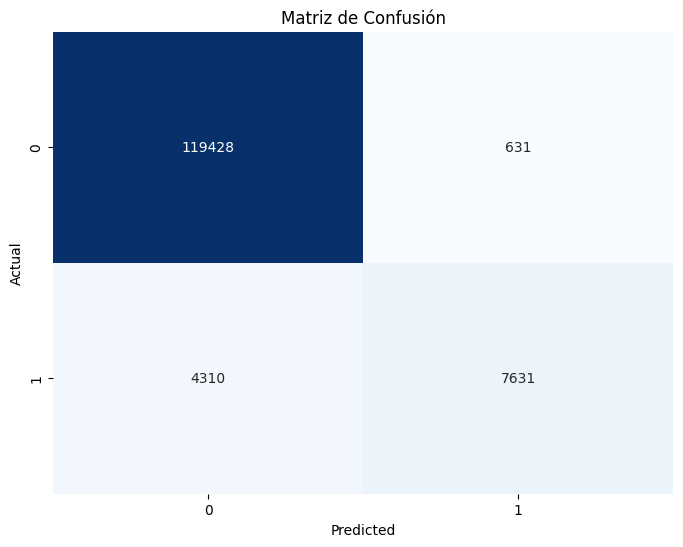

In [48]:
cm = confusion_matrix(y_train, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [49]:
print(classification_report(y_train, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    120059
         1.0       0.92      0.64      0.76     11941

    accuracy                           0.96    132000
   macro avg       0.94      0.82      0.87    132000
weighted avg       0.96      0.96      0.96    132000



In [50]:
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Apply a threshold to get predicted classes
y_pred_classes

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step


array([0, 1, 0, ..., 1, 0, 0])

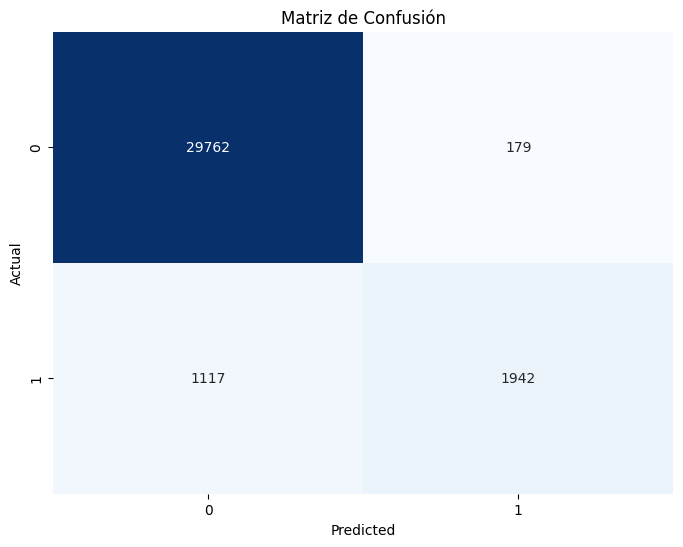

In [51]:
#y_test_classes = y_test_encoded.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [52]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     29941
         1.0       0.92      0.63      0.75      3059

    accuracy                           0.96     33000
   macro avg       0.94      0.81      0.86     33000
weighted avg       0.96      0.96      0.96     33000



In [53]:
print (X_train)

         Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
117558  21.0    Male    29.0             30.0            1.0           18.0   
163991  46.0    Male     7.0             11.0            0.0           13.0   
153167  19.0    Male    30.0             22.0            1.0           13.0   
112382  23.0    Male    25.0             28.0            1.0            8.0   
64212   48.0    Male    52.0              9.0            1.0            0.0   
...      ...     ...     ...              ...            ...            ...   
120338  24.0    Male    33.0              1.0            2.0            0.0   
116008  27.0    Male    16.0             16.0            2.0           14.0   
11275   28.0  Female    41.0              3.0            2.0           15.0   
110509  35.0    Male     2.0             22.0            1.0            8.0   
121963  42.0    Male    37.0             12.0            0.0            6.0   

       Subscription Type Contract Length  Total Spe

CONCLUSIÓN:

Basados en la arquitectura del punto 1 y conservando los valores de hiperparámetros definimos un modelo con Keras que nos sugirió unos mejores hiperparámetros para entrenar nuestro modelo y al verificar la matriz de confusión encontramos que este nuevo modelo a diferencia del que se tenía en el punto 1 ahora ya logra clasificar la variable objetivo (clientes que hacen Churn) con una mayor precisión.

El modelo clasifica y tiene unas buenas métricas tanto para los datos de entrenamiento como para los de prueba, se observó un accuracy de 0.97 en ambos casos.


